In [1]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import ctypes
import csv
import glob
import os
import sys
import math
import tensorflow as tf
sys.path.append('/nethome/shickson3/CreateNormals/')
from python.calc_normals import NormalCalculation
sys.path.append('/nethome/shickson3/pySceneNetRGBD')
import scenenet_pb2 as sn

In [71]:
file_number = 3

image_files = []
depth_files = []
label_files = []
dataset_file = open('scenenet_example.txt','r')
for line in dataset_file:
    fields = line.strip('\n').split(',')
    image_files.append(fields[0])
    depth_files.append(fields[1])
    label_files.append(fields[2])

/srv/datasets/scenenet/train/3/3757/photo/4475.jpg
/srv/datasets/scenenet/train/3/3757/depth/4475.png
/srv/datasets/scenenet/train/3/3757/instance/4475.png
(240, 320, 3)


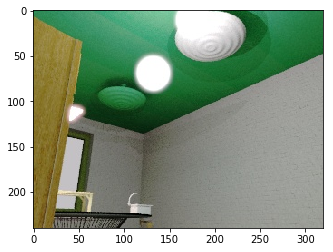

In [72]:
print image_files[file_number]
print depth_files[file_number]
print label_files[file_number]
image = cv2.imread(image_files[file_number], cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print(image.shape)

(240, 320)


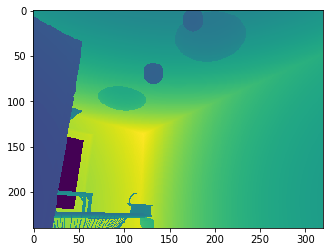

In [73]:
depth = cv2.imread(depth_files[file_number], cv2.IMREAD_ANYDEPTH)
plt.imshow(depth)
print(depth.shape)
#print np.unique(depth)

(240, 320)
[ 1  3  4  5  7  8  9 10 11 12]


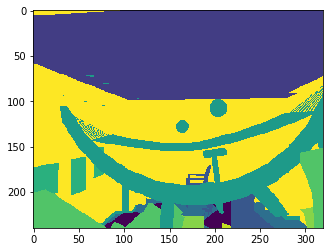

In [96]:
labels = cv2.imread(label_files[file_number], cv2.IMREAD_ANYDEPTH)
plt.imshow(labels)
print(labels.shape)
print np.unique(labels)

In [75]:
camera_params = [277.128129211,0,160,0,289.705627485,120,0,0,1]
normal_params = [5,0.02,10]
flat_labels = []
norm_calc = NormalCalculation(camera_params, normal_params, flat_labels)
normals = norm_calc.Calculate(depth, labels)
#print (320/2.0)/math.tan(math.radians(60/2.0))
#print (240/2.0)/math.tan(math.radians(45/2.0))

[-0.99998844 -0.9999746  -0.99996996 ...  0.9999207   0.99992555
  0.9999405 ]


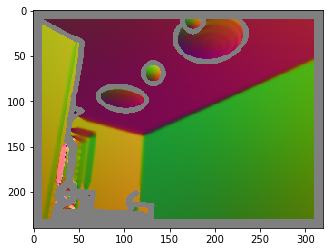

In [76]:
print np.unique(normals)
plt.imshow((normals + 1) / 2.0)

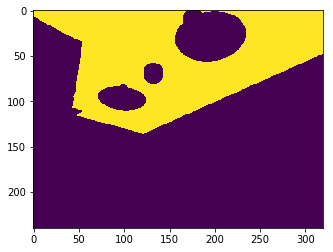

In [89]:
plt.imshow(labels == 2)

# Scenenet Flat Labels
Category = ID, NYU40 ID
ceiling = 2, 22
floor = 3, 2
Lamp? = 4, ?
Wall = 6, 1
doorframe = 7, 8
door = ?, 8
window = ?, 9
table = 14, 7
picture = ?, 11
box = ?, 29
doorframe = ?, 8
desk = ?, 14
shelf = ?, 15 (maybe exclude this?)
mirror = ?, 19
whiteboard = ?, 30
coffee table = ?, 7
nightstand = ?, 32
computer tower = ?, 40 (also telephone and cup so let's ignore this)
fridge = ?, 24
end table = ?, 7
shower walls = ?, 1
closet wall = ?, 1
bathtub = 48, ?
chair = 56, ?


In [97]:
tmp = label_files[file_number]
fields = tmp.split('instance')
print(fields[0] + 'label' + fields[1])

/srv/datasets/scenenet/train/3/3757/label/4475.png


In [100]:
trajectories = sn.Trajectories()
with open('/srv/datasets/scenenet/train_protobufs/scenenet_rgbd_train_0.pb','rb') as f:
    trajectories.ParseFromString(f.read())

In [104]:
dir(trajectories.trajectories[0])

['ByteSize',
 'Clear',
 'ClearExtension',
 'ClearField',
 'CopyFrom',
 'DESCRIPTOR',
 'DiscardUnknownFields',
 'Extensions',
 'FindInitializationErrors',
 'FromString',
 'HasExtension',
 'HasField',
 'IsInitialized',
 'ListFields',
 'MergeFrom',
 'MergeFromString',
 'ParseFromString',
 'RegisterExtension',
 'SerializePartialToString',
 'SerializeToString',
 'SetInParent',
 'UnknownFields',
 'WhichOneof',
 '_CheckCalledFromGeneratedFile',
 '_SetListener',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_extensions_by_name',
 '_extensions_by_number',
 'instances',
 'layout',
 'render_path',
 'views']

In [4]:
tmp = np.random.rand(3,2,1)
print tmp.shape
print tmp

(3, 2, 1)
[[[0.66915053]
  [0.51991257]]

 [[0.23393163]
  [0.4040178 ]]

 [[0.01362784]
  [0.08289726]]]


In [9]:
pl = tf.placeholder(tf.float32, [3,2,1])
stacked = tf.tile(pl, [1,1,3])
with tf.Session() as sess:
    feed_dict = {pl: tmp}
    output = sess.run([stacked], feed_dict=feed_dict)

print output[0].shape
print output[0]

(3, 2, 3)
[[[0.66915053 0.66915053 0.66915053]
  [0.51991254 0.51991254 0.51991254]]

 [[0.23393163 0.23393163 0.23393163]
  [0.4040178  0.4040178  0.4040178 ]]

 [[0.01362783 0.01362783 0.01362783]
  [0.08289726 0.08289726 0.08289726]]]


In [11]:
print tmp[0,0,0]
print tmp[0,1,0]
print tmp[1,0,0]

0.6691505349559744
0.5199125659168823
0.23393163099443126


In [13]:
tmp2 = output[0]
print tmp2[0,0,2]
print tmp2[0,1,2]
print tmp2[1,0,2]

0.66915053
0.51991254
0.23393163


In [1]:
tmp_check = 100

NameError: name 'tmp_' is not defined